#**Stabilization of Cart Pole system**:
> Consider cart pole system:
>
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1O1iM6MByfMyrO0txAMFb_miOqPNzFAvm" align="center" hspace="350px" vspace="0px"></p>
>
>
> Do the following:
>*   1) Design the linear feedback controller using linearization of the cart-pole dynamics.
>*   2) Simulate the response of your controller on the linearized and nonlinear system, compare the results.
>*   3) Taking into account that $y = Cx$ is measured, design observer and linear control that uses observer state.
>*   4) Simulate the nonlinear system with the observer and controller, show the difference between the actual motion of the nonlinear system and its estimate produced by teh observer.
>
> [Here is the great illustration of the hardware implemintation of the cart-pole](https://www.youtube.com/shorts/NJxBJ2LJY7w)


### Derivation of Lagrange Equations for the Cart-Pole System




#### Step 1: Generalized coordinates
We define the generalized coordinates as:
- $q_1 = p$ — horizontal position of the cart
- $q_2 = \theta$ — angle of the pendulum from the vertical (upward)

Thus, the generalized coordinate vector is:
$q = \begin{bmatrix} p \\ \theta \end{bmatrix}$



#### Step 2: Kinetic Energy $T(q, \dot{q})$

The total kinetic energy $T$ consists of:
- Kinetic energy of the cart:
$T_{\text{cart}} = \frac{1}{2}M\dot{p}^2$
- Kinetic energy of the pendulum:
  - Position of the pendulum's center of mass:
$x = p + L\sin\theta,\quad y = -L\cos\theta$
  - Velocities:
$\dot{x} = \dot{p} + L\dot{\theta}\cos\theta,\quad \dot{y} = L\dot{\theta}\sin\theta$
  - Thus:
$T_{\text{pendulum}} = \frac{1}{2}m(\dot{x}^2 + \dot{y}^2)
= \frac{1}{2}m\left[(\dot{p} + L\dot{\theta}\cos\theta)^2 + (L\dot{\theta}\sin\theta)^2\right]$

Expanding:
$= \frac{1}{2}m\left[\dot{p}^2 + 2L\dot{p}\dot{\theta}\cos\theta + L^2\dot{\theta}^2(\cos^2\theta + \sin^2\theta)\right]$

$= \frac{1}{2}m\dot{p}^2 + mL\dot{p}\dot{\theta}\cos\theta + \frac{1}{2}mL^2\dot{\theta}^2$
(using $\cos^2\theta + \sin^2\theta = 1$).

Thus, the total kinetic energy is:
$T = \frac{1}{2}(M+m)\dot{p}^2 + mL\dot{p}\dot{\theta}\cos\theta + \frac{1}{2}mL^2\dot{\theta}^2$



#### Step 3: Potential Energy $U(q)$

For cart potential energy is $0$

The potential energy of the pendulum (gravity acts downward) is:
$U = mgy = -mgL\cos\theta$



#### Step 4: Lagrangian $\mathcal{L} = T - U$

Thus, the Lagrangian is:
$\mathcal{L}(p, \theta, \dot{p}, \dot{\theta}) = \frac{1}{2}(M+m)\dot{p}^2 + mL\dot{p}\dot{\theta}\cos\theta + \frac{1}{2}mL^2\dot{\theta}^2 + mgL\cos\theta$



#### Step 5: Lagrange's Equations

For each generalized coordinate $q_i \in \{p, \theta\}$:

$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}_i}\right) - \frac{\partial \mathcal{L}}{\partial q_i} = Q_i$

where:
- $Q_p = u$ (external force applied to the cart),
- $Q_\theta = 0$ (no direct torque on the pendulum).



#### For $p$:

- $\frac{\partial \mathcal{L}}{\partial \dot{p}} = (M+m)\dot{p} + mL\dot{\theta}\cos\theta$
- Time derivative:
$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{p}}\right) = (M+m)\ddot{p} + mL(\ddot{\theta}\cos\theta - \dot{\theta}^2\sin\theta)$
- $\frac{\partial \mathcal{L}}{\partial p} = 0$

Thus:
$(M+m)\ddot{p} + mL\ddot{\theta}\cos\theta - mL\dot{\theta}^2\sin\theta = u$


#### For $\theta$:

- $\frac{\partial \mathcal{L}}{\partial \dot{\theta}} = mL\dot{p}\cos\theta + mL^2\dot{\theta}$
- Time derivative:
$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}}\right) = mL\ddot{p}\cos\theta - mL\dot{p}\dot{\theta}\sin\theta + mL^2\ddot{\theta}$
- $\frac{\partial \mathcal{L}}{\partial \theta} = -mL\dot{p}\dot{\theta}\sin\theta - mgL\sin\theta$

Thus:
$mL\ddot{p}\cos\theta + mL^2\ddot{\theta} + mgL\sin\theta = 0$

---

# Final Lagrange Equations:

$\boxed{
\begin{aligned}
&(M+m)\ddot{p} + mL\ddot{\theta}\cos\theta - mL\dot{\theta}^2\sin\theta = u \\
&mL\ddot{p}\cos\theta + mL^2\ddot{\theta} + mgL\sin\theta = 0
\end{aligned}
}$


##**System Dynamics**:

Recall the dynamics of cart-pole system:
\begin{equation}
\begin{cases}
\left(M+m\right){\ddot {p}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{p} \cos \theta  \\
\end{cases}
\end{equation}

where $\theta$ is angle of the pendulum measured from the upper equilibrium and $p$ is position of cart


Choosing the state to be $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$One may rewrite this dynamics in the state-space form as:
\begin{equation}
\mathbf{\dot{x}} =
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{p} \\
\ddot{p}
\end{bmatrix}
=
\begin{bmatrix}
\dot{\theta} \\
\frac{(M+m)g \sin \theta - mL \dot{\theta}^2 \sin\theta \cos\theta}{(M + m\sin^2 \theta)L} \\
\dot{x} \\
\frac{mg\sin\theta \cos\theta - mL\dot{\theta}^2 \sin \theta}{M + m\sin^2 \theta} \\
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{\cos\theta}{(M + m\sin^2 \theta)L} \\
0 \\
\frac{1}{M + m\sin^2 \theta} \\
\end{bmatrix} u
\end{equation}


###**System parameters**:
Let us choose the following parameters:

In [ ]:
m = 0.5 # mass of pendulum bob
M = 2 # mass of cart
pendulumn_length = 0.3 # length of pendulum
g = 9.81 # gravitational acceleration


####**Nonlinear dynamics**:

First of all let us define the nonlinear system in form $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})$ :

In [ ]:
import numpy as np
from math import cos, sin

import matplotlib.pyplot as plt

# sin, cos = np.sin, np.cos
# Nnonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    u = u[0]

    denominator = M + m*(sin(theta)**2)
    ddtheta = ((M + m)*g*sin(theta) - m* pendulumn_length * dtheta**2 *sin(theta) * cos(theta) + cos(theta)*u)/(denominator * pendulumn_length)
    ddp = (m*g*sin(theta)*cos(theta) - m* pendulumn_length * dtheta**2 *sin(theta) + u)/denominator

    dx = np.array([dtheta, ddtheta, dp, ddp])
    return dx

x0 = np.array([1, # Initial pendulum angle
      0, # Initial pendulum angular speed
      1, # Initial cart position
      0]) # Initial cart speed
u0 = np.array([0])
print(f(x0, u0))

[ 0.         29.22225161  0.          0.947331  ]


###**Linearized Dynamics**:

Liniarization around the upper equilibrium $\mathbf{x} = [0,0,0,0]$ yields:

\begin{equation}
\mathbf{\dot{x}} =
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{p} \\
\ddot{p}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0\\
\frac{(M+m)}{M}\frac{g}{L} & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\frac{m}{M}g & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
\theta \\
\dot{\theta} \\
p \\
\dot{p}
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{1}{ML} \\
0 \\
\frac{1}{M}
\end{bmatrix}
u
\end{equation}

In [ ]:
# System matrix
A = np.array([[0, 1, 0, 0],
             [(M + m)*g /(M*pendulumn_length), 0, 0, 0],
             [0,0,0,1],
             [m*g/M, 0, 0, 0]])
# Input matrix
B = np.array([[0],
             [1/(M*pendulumn_length)],
             [0],
             [1/M]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

print(A)

[[ 0.      1.      0.      0.    ]
 [40.875   0.      0.      0.    ]
 [ 0.      0.      0.      1.    ]
 [ 2.4525  0.      0.      0.    ]]


###**Controller Design**:

Let us design the controller for linearized plant by placing poles (eigen values) on the left-hand side of complex plane:


### Design controller using Pole placement

We want to make system stable $$\dot x = (A - BK)x $$

For it, let's choose eigenvalues: $$λ = [-2, -3, -4, - 5]$$ and then compute matrix $K$

In [ ]:
from scipy.signal import place_poles

poles = [-2.0, -3.0, -4.0, -5.0]

result = place_poles(A, B, poles)
K = result.gain_matrix
print("K =", K.round(2))

K = [[69.33 11.23 -7.34 -9.42]]


Insert your control design / observer design code here.

Check eigenvalues of the closed-loop system for 1) closed-loop for the case when full state information is availible and no observer is used, 2) when only measurement y = C*x is availible and an observer is used.

### Check eigenvalues

#### 1 Case - Full state information

For such case we need to find eigenvalues for $$(A-BK)$$

In [ ]:
A_cl = A - B @ K
eigs = np.linalg.eigvals(A_cl)
print("Eigenvalues", eigs)

Eigenvalues [-5. -4. -3. -2.]


#### 2 Case - $y = C x$ only

For such case we need to find observer $L$, for estimate state $\hat{x}$, since only partial measurements $( y = Cx $) are available

$$\dot{\hat{x}} = A\hat{x} + Bu + L(y - C\hat{x})$$

Let's determine $e = x - \hat{x}$, and we want to minimize this error

$$\dot e = Ax + Bu - A\hat{x} - Bu - L(y - C\hat{x}) = (A - LC)e $$

So we have error dynamic and we want to know when system is stable. For it we need to find eiginvalues of $(A-LC)$, but we can't apply LQR/pole placement directly, cause it observer design, not controll. `place_poles()` and LQR in most libraries (e.g., `scipy`) are implemented for **control design**, not for **observer design**.
 But if $(A -LC)$ is hurvits, then $(A-LC)^T$ is hurvits and now we can apply pole placement.



In [ ]:
poles_L = [-10, -11, -12, -13]
L_T = place_poles(A.T, C.T, poles_L).gain_matrix
L = L_T.T

A_obs = A - L @ C

A_total = np.block([
    [A_cl,         B @ K],
    [np.zeros_like(A), A_obs]
])

eig_obs = np.linalg.eigvals(A_obs)
eig_total = np.linalg.eigvals(A_total)

print("Observer gain matrix L:\n", L.round(2))
print("\nEigenvalues of A - LC (observer):", eig_obs.round(2))
print("\nEigenvalues of full closed-loop system:", eig_total.round(2))

Observer gain matrix L:
 [[1.151e+01 1.500e+00 0.000e+00]
 [4.137e+01 1.149e+01 0.000e+00]
 [0.000e+00 0.000e+00 2.300e+01]
 [2.490e+00 3.000e-02 1.300e+02]]

Eigenvalues of A - LC (observer): [-12. -11. -13. -10.]

Eigenvalues of full closed-loop system: [ -5.  -4.  -3.  -2. -13. -12. -11. -10.]


#### Using Separetion principle :

Hence $(A - BK)$ and $(A - LC)$ stable independent(negative eigenvalues), the overall system stable

*For reliability, I  derived in code the eigenvalues ​​of the combined matrix*

##**Simulation**:
We proceed with the simulation of designed controller, firstly we will define the simulation parameters:

In [ ]:
# Time settings
t0 = 0 # Initial time
tf = 10 # Final time
N = 1000 # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point
theta_0 = 0.4
p_0 = 0.1

# Set initial state
x0 = np.array([theta_0, # Initial pendulum angle
      0, # Initial pendulum angular speed
      p_0, # Initial cart position
      0]) # Initial cart speed


####**Linearized dynamics**:
Now let us simulate the response of linear controller on the **linearized** system:

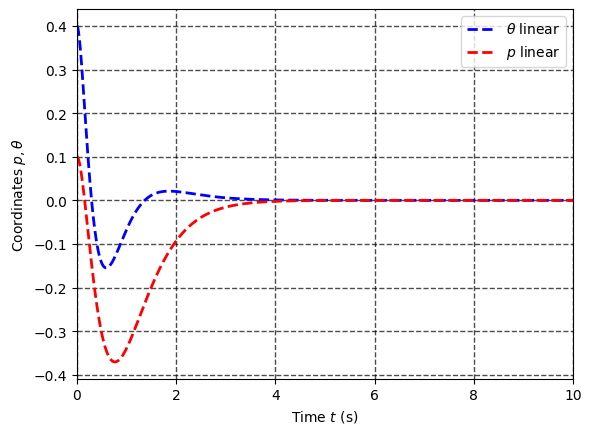

In [ ]:
# import integrator routine
from scipy.integrate import odeint

# Define the linear ODE to solve
def linear_ode(x, t, A, B, K):
    # Linear controller
    u = - np.dot(K,x)
    # Linearized dynamics
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

# integrate system "sys_ode" from initial state $x0$
x_l = odeint(linear_ode, x0, t, args=(A, B, K,))
theta_l, dtheta_l, p_l, dp_l = x_l[:,0], x_l[:,1], x_l[:,2], x_l[:,3]
# Plot the resulst
plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

Now we will simulate similarly to linear case while using the same gains $\mathbf{K}$:

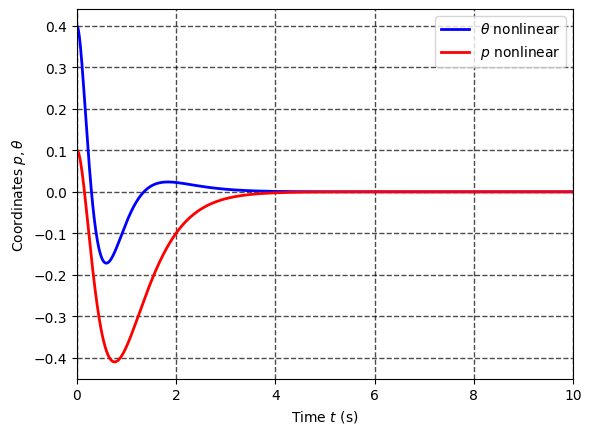

In [ ]:
def nonliear_ode(x, t, K):

    # Linear controller
    u = - np.dot(K,x)

    # Nonlinear dynamics
    dx = f(x, u)

    return dx

# integrate system "sys_ode" from initial state $x0$
x_nl = odeint(nonliear_ode, x0, t, args=(K,))
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3]
# Plot the resulst
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()


###**Comparison**:
One may compare the linear and nonlinear responses by plotting them together:

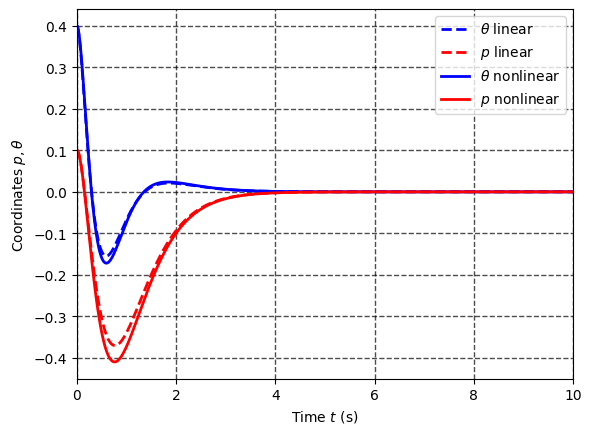

In [ ]:
# theta_l, p_l - values of theta and p for the linear system
# theta_nl, p_nl - values of theta and p for the nonlinear system

plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

In general, linearization follows the real motion of the system well, except for sudden changes in coordinates. At such moments, the error between the real and approximate motion increases.

### Simulation with observer



Insert your code simulating the behaviour of the nonlinear system with an observer. Plot the results, compare state estimatio and actual state of the system.

*Linear Control depends on observer state*
$$u = -K \hat{x}$$

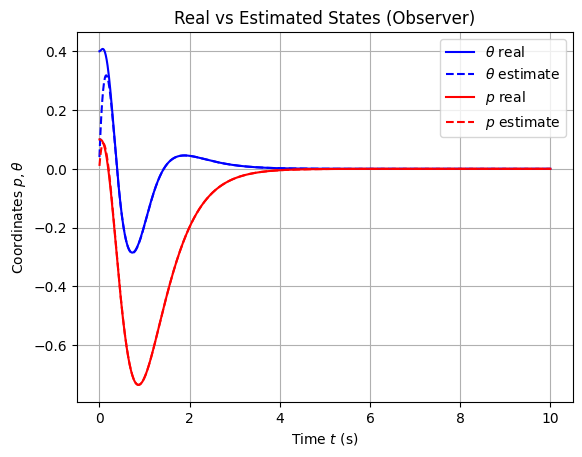

In [ ]:
def observer_ode(z, t, A, B, C, K, L):
    # z = [x; x_hat]
    n = 4
    x = z[:n]
    x_hat = z[n:]

    y = np.dot(C, x)
    y_hat = np.dot(C, x_hat)

    u = -np.dot(K, x_hat)

    dx = f(x, u)

    dx_hat = np.dot(A, x_hat) + np.dot(B, u) + np.dot(L, (y - y_hat))

    return np.concatenate((dx, dx_hat))
z0 = np.concatenate((x0, x0*0.1))
z = odeint(observer_ode, z0, t, args=(A, B, C, K, L))

x_real = z[:, :4]
x_hat = z[:, 4:]

theta_real = x_real[:, 0]
theta_hat = x_hat[:, 0]
p_real = x_real[:, 2]
p_hat = x_hat[:, 2]

plt.plot(t, theta_real, 'b', label=r'$\theta$ real')
plt.plot(t, theta_hat, 'b--', label=r'$\theta$ estimate')
plt.plot(t, p_real, 'r', label=r'$p$ real')
plt.plot(t, p_hat, 'r--', label=r'$p$ estimate')

plt.grid(True)
plt.legend()
plt.xlabel(r'Time $t$ (s)')
plt.ylabel(r'Coordinates $p,\theta$')
plt.title('Real vs Estimated States (Observer)')
plt.show()


# Animation

In [ ]:
p = p_nl
theta = theta_nl
time = t

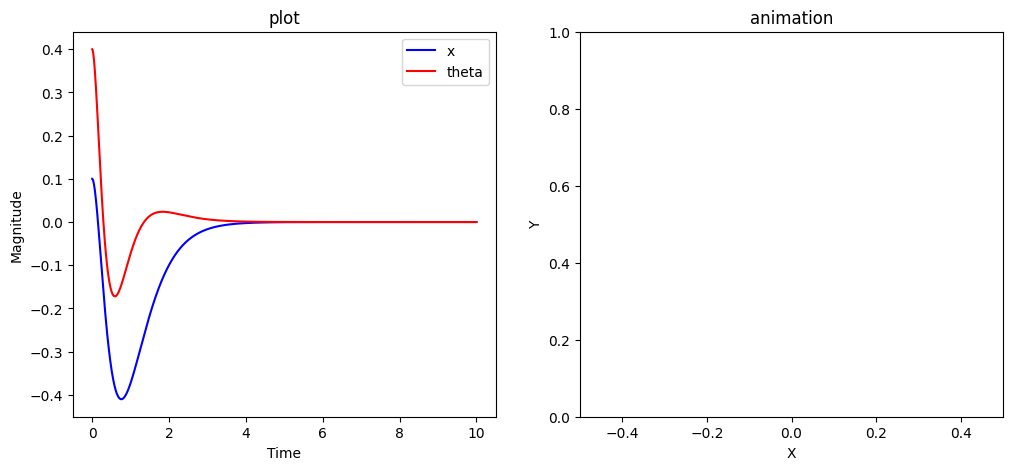

In [ ]:
%matplotlib inline

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
# ax1.set_xlim(( 0, 2))
# ax1.set_ylim((-0.3, 0.3))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-0.5,0.5))
ax2.set_ylim((0,1))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('animation')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('plot')
line_x,     = ax1.plot(time, p, 'b')     # ax.plot returns a list of 2D line objects
line_theta, = ax1.plot(time, theta, 'r')
point_x,     = ax1.plot([], [], 'g.', ms=20)
point_theta, = ax1.plot([], [], 'g.', ms=20)

draw_cart,  = ax2.plot([], [], 'b', lw=2)
draw_shaft, = ax2.plot([], [], 'r', lw=2)

ax1.legend(['x','theta']);

In [ ]:

shaft_l = 0.3
cart_l = 0.1
cart_x = np.array([-1, -1, 1, 1, -1])*cart_l
cart_y = np.array([ 0,  1, 1, 0,  0])*cart_l


# animation function. This is called sequentially
def drawframe(n):

    shaft_x = np.array([ p[n],  p[n] + shaft_l*sin(theta[n] )])
    shaft_y = np.array([ cart_l/2,  cart_l/2 + shaft_l*cos(theta[n] )])

    line_x.set_data(time, p)
    line_theta.set_data(time, theta)

    point_x.set_data([time[n]], [p[n]])
    point_theta.set_data([time[n]], [theta[n]])

    draw_cart.set_data([cart_x+p[n]], [cart_y])
    draw_shaft.set_data([shaft_x], [shaft_y])

    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (draw_cart,draw_shaft)

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=20, blit=True)

## Here we try to make a video of the cart-pole as it moves

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())